In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Write the folder where your data folder is located

In [ ]:
path = "/content/drive/My Drive/" + "DL-NLP/Data/"

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install pyenchant
!sudo apt install -qq enchant
!pip install neuralcoref

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
enchant is already the newest version (1.6.0-11.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [ ]:
import nltk
import spacy
import pytesseract
import enchant
from bs4 import BeautifulSoup
import cv2
from google.colab.patches import cv2_imshow
from urllib.request import urlopen
from pprint import pprint

# Data Acquisition & Text Extraction

We will use two famous NLP libraries with basic (but powerful) text wrangling abilities:


*   NLTK
*   Spacy

The task will be to extract text from: 

1.   A CBS news article (https://www.cbsnews.com/news/taliban-on-trump-we-hope-he-will-win-the-election-withdraw-us-troops/)
2.   A NLTK corpus- the European parliament proceedings in German
3. Text from memes




### 1. CBS news

In [ ]:
url = "https://www.cbsnews.com/news/taliban-on-trump-we-hope-he-will-win-the-election-withdraw-us-troops/"
html = urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
soup.find_all("p")

[<p class="breaking-news__headline">Watch CBSN Live</p>,
 <p class="content__meta content__meta-byline">
                   By Sami Yousafzai
               </p>,
 <p class="content__meta content__meta-timestamp">
 <time datetime="2020-10-11T09:30:00-0400">Updated on:  October 11, 2020 / 9:30 AM</time>
       / CBS News
     </p>,
 <p><em>Editor's Note: A statement in this article was incorrectly attributed to Taliban spokesman Zabihullah Mujahid. It was told to CBS News by another senior Taliban leader. CBS News has corrected that attribution and added additional statements from the interview with Mujahid.<br/></em></p>,
 <p>President Trump's reelection bid received a vote of support Friday from an entity most in his party would reject: the Taliban.</p>,
 <p>Taliban spokesman Zabihullah Mujahid told CBS News in a phone interview, "We believe that Trump is going to win the upcoming election because he has proved himself a politician who accomplished all the major promises he had made t

In [ ]:
sentences = soup.find_all("p", attrs={'class': None})

In [ ]:
cbs_text = ""
for s in sentences:
  if not s.find("em"):
    cbs_text += s.text + " "
print(len(cbs_text))
cbs_text[:200]

4959


"President Trump's reelection bid received a vote of support Friday from an entity most in his party would reject: the Taliban. Taliban spokesman Zabihullah Mujahid told CBS News in a phone interview, "

Pro-Tip: Learn to use **Selenium**! With it you can crawl websites 

### 2. NLTK Corpus

In [ ]:
nltk.download('europarl_raw')
from nltk.corpus import europarl_raw
europe_text = europarl_raw.german.raw(fileids='ep-00-01-17.de')
print(len(europe_text))
# First 100 characters in the corpus
europe_text[:200]

[nltk_data] Downloading package europarl_raw to /root/nltk_data...
[nltk_data]   Package europarl_raw is already up-to-date!
157171


' \nWiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen , wünsche Ihnen nochmals alles Gute z'

### 3. Memes

In [ ]:
meme = cv2.imread(path + "meme_test.png")
pytesseract.image_to_string(meme)

'a\nONLY JUST:BEGUN\n— es eG\ne Sa\n\nae\nTACT CS\n\x0c'

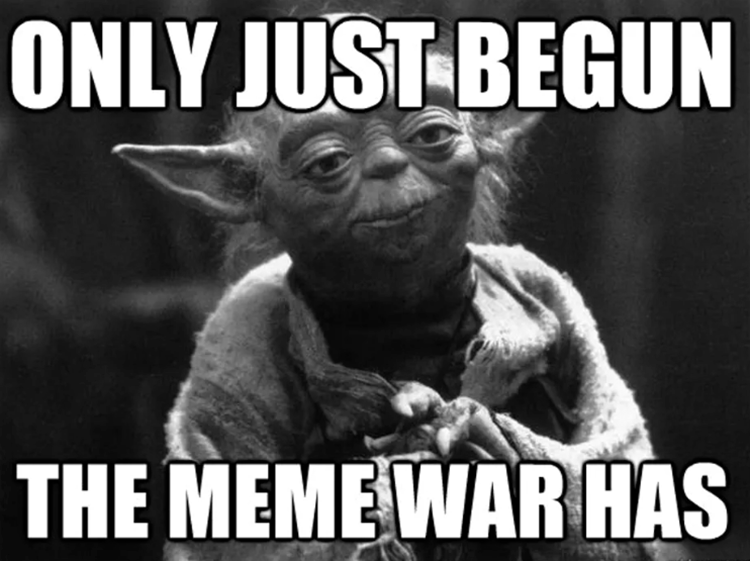

In [ ]:
image = cv2.imread(path + "meme_test.png")
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayImage)

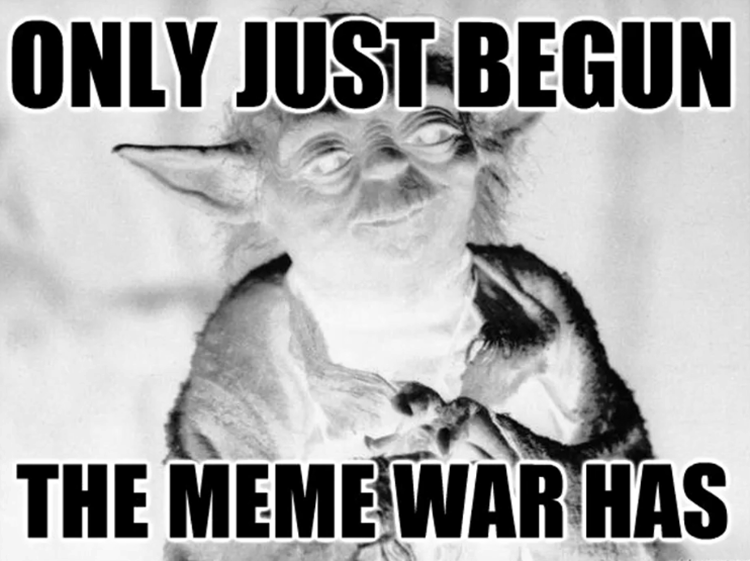

In [ ]:
invertedImage = cv2.bitwise_not(grayImage)
cv2_imshow(invertedImage)

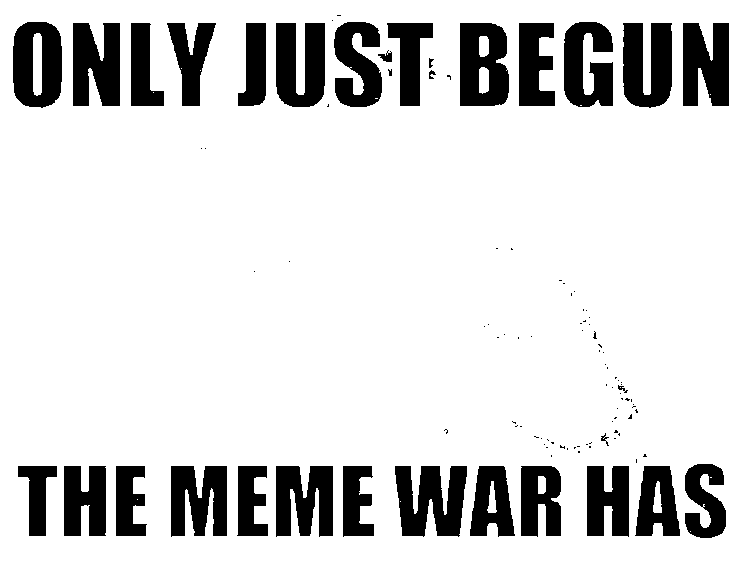

In [ ]:
(thresh, blackAndWhiteImage) = cv2.threshold(invertedImage, 5, 255, cv2.THRESH_BINARY)
cv2_imshow(blackAndWhiteImage)

In [ ]:
meme_text = pytesseract.image_to_string(blackAndWhiteImage)

### Unicode Normalization

In [ ]:
text = 'I love 🍕! Shall we book a 🚗 to Rome?'
print(text)
encoded_text = text.encode("utf-8")
print(encoded_text)

I love 🍕! Shall we book a 🚗 to Rome?
b'I love \xf0\x9f\x8d\x95! Shall we book a \xf0\x9f\x9a\x97 to Rome?'


### Spelling Correction

In [ ]:
english_spelling = enchant.Dict("en_US")
english_spelling.check("Hllo")

False

In [ ]:
english_spelling.suggest("Hllo")

['Hello', 'Halo']

We need to break the text into words to be able to check the spelling of the corpus

# Pre-Processing

The task now is to pre-process the text in order to use it later in a model

### Sentence Tokenizer

In [ ]:
# NLTK
nltk.download('punkt')
cbs_sentences = nltk.sent_tokenize(cbs_text)
cbs_sentences[:5]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["President Trump's reelection bid received a vote of support Friday from an entity most in his party would reject: the Taliban.",
 'Taliban spokesman Zabihullah Mujahid told CBS News in a phone interview, "We believe that Trump is going to win the upcoming election because he has proved himself a politician who accomplished all the major promises he had made to American people, although he might have missed some small things, but did accomplish the bigger promises, so it is possible that the U.S. people who experienced deceptions in the past will once again trust Trump for his decisive actions."',
 'Mujahid added, "We think the majority of the American population is tired of instability, economic failures and politicians\' lies and will trust again on Trump because Trump is decisive, could control the situation inside the country.',
 'Other politicians, including Biden, chant unrealistic slogans.',
 'Some other groups, which are smaller in size but are involved in the military busines

In [ ]:
europe_sentences = nltk.sent_tokenize(europe_text, language='german')
europe_sentences[:5]

[' \nWiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen , wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe , daß Sie schöne Ferien hatten .',
 'Wie Sie feststellen konnten , ist der gefürchtete " Millenium-Bug " nicht eingetreten .',
 'Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden .',
 'Im Parlament besteht der Wunsch nach einer Aussprache im Verlauf dieser Sitzungsperiode in den nächsten Tagen .',
 'Heute möchte ich Sie bitten - das ist auch der Wunsch einiger Kolleginnen und Kollegen - , allen Opfern der Stürme , insbesondere in den verschiedenen Ländern der Europäischen Union , in einer Schweigeminute zu gedenken .']

### Word Tokenization

In [ ]:
# NLTK
nltk.download('stopwords')
stop_words_nltk = set(nltk.corpus.stopwords.words('english'))

cbs_tokenized = nltk.word_tokenize(cbs_text)
print(cbs_tokenized[:50])
cbs_tokenized_wostopwords = [i for i in cbs_tokenized if not i in stop_words_nltk]
print(cbs_tokenized_wostopwords[:50])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['President', 'Trump', "'s", 'reelection', 'bid', 'received', 'a', 'vote', 'of', 'support', 'Friday', 'from', 'an', 'entity', 'most', 'in', 'his', 'party', 'would', 'reject', ':', 'the', 'Taliban', '.', 'Taliban', 'spokesman', 'Zabihullah', 'Mujahid', 'told', 'CBS', 'News', 'in', 'a', 'phone', 'interview', ',', '``', 'We', 'believe', 'that', 'Trump', 'is', 'going', 'to', 'win', 'the', 'upcoming', 'election', 'because', 'he']
['President', 'Trump', "'s", 'reelection', 'bid', 'received', 'vote', 'support', 'Friday', 'entity', 'party', 'would', 'reject', ':', 'Taliban', '.', 'Taliban', 'spokesman', 'Zabihullah', 'Mujahid', 'told', 'CBS', 'News', 'phone', 'interview', ',', '``', 'We', 'believe', 'Trump', 'going', 'win', 'upcoming', 'election', 'proved', 'politician', 'accomplished', 'major', 'promises', 'made', 'American', 'people', ',', 'although', 'might', 'missed', 'sma

In [ ]:
stop_words_nltk_de = set(nltk.corpus.stopwords.words('german'))

europe_tokenized = nltk.word_tokenize(europe_text, language="german")
print(europe_tokenized[:50])
europe_tokenized_wostopwords = [i for i in europe_tokenized if not i in stop_words_nltk_de]
print(europe_tokenized_wostopwords[:50])

['Wiederaufnahme', 'der', 'Sitzungsperiode', 'Ich', 'erkläre', 'die', 'am', 'Freitag', ',', 'dem', '17.', 'Dezember', 'unterbrochene', 'Sitzungsperiode', 'des', 'Europäischen', 'Parlaments', 'für', 'wiederaufgenommen', ',', 'wünsche', 'Ihnen', 'nochmals', 'alles', 'Gute', 'zum', 'Jahreswechsel', 'und', 'hoffe', ',', 'daß', 'Sie', 'schöne', 'Ferien', 'hatten', '.', 'Wie', 'Sie', 'feststellen', 'konnten', ',', 'ist', 'der', 'gefürchtete', '``', 'Millenium-Bug', '``', 'nicht', 'eingetreten', '.']
['Wiederaufnahme', 'Sitzungsperiode', 'Ich', 'erkläre', 'Freitag', ',', '17.', 'Dezember', 'unterbrochene', 'Sitzungsperiode', 'Europäischen', 'Parlaments', 'wiederaufgenommen', ',', 'wünsche', 'Ihnen', 'nochmals', 'Gute', 'Jahreswechsel', 'hoffe', ',', 'Sie', 'schöne', 'Ferien', '.', 'Wie', 'Sie', 'feststellen', 'konnten', ',', 'gefürchtete', '``', 'Millenium-Bug', '``', 'eingetreten', '.', 'Doch', 'Bürger', 'unserer', 'Mitgliedstaaten', 'Opfer', 'schrecklichen', 'Naturkatastrophen', 'geworden',

In [ ]:
# SPACY
nlp = spacy.load('en_core_web_sm')
cbs_spacy = nlp(cbs_text)
cbs_tokenized = [token.text for token in cbs_spacy]
print(cbs_tokenized[:50])
cbs_tokenized_wostopwords = [token.text for token in cbs_spacy if not token.is_stop]
print(cbs_tokenized_wostopwords[:50])

['President', 'Trump', "'s", 'reelection', 'bid', 'received', 'a', 'vote', 'of', 'support', 'Friday', 'from', 'an', 'entity', 'most', 'in', 'his', 'party', 'would', 'reject', ':', 'the', 'Taliban', '.', 'Taliban', 'spokesman', 'Zabihullah', 'Mujahid', 'told', 'CBS', 'News', 'in', 'a', 'phone', 'interview', ',', '"', 'We', 'believe', 'that', 'Trump', 'is', 'going', 'to', 'win', 'the', 'upcoming', 'election', 'because', 'he']
['President', 'Trump', 'reelection', 'bid', 'received', 'vote', 'support', 'Friday', 'entity', 'party', 'reject', ':', 'Taliban', '.', 'Taliban', 'spokesman', 'Zabihullah', 'Mujahid', 'told', 'CBS', 'News', 'phone', 'interview', ',', '"', 'believe', 'Trump', 'going', 'win', 'upcoming', 'election', 'proved', 'politician', 'accomplished', 'major', 'promises', 'American', 'people', ',', 'missed', 'small', 'things', ',', 'accomplish', 'bigger', 'promises', ',', 'possible', 'U.S.', 'people']


In [ ]:
import spacy.cli
spacy.cli.download("de_core_news_sm")

✔ Download and installation successful
You can now load the model via spacy.load('de_core_news_sm')


In [ ]:
nlp_de = spacy.load('de_core_news_sm')
europe_spacy = nlp_de(europe_text)
europe_tokenized = [token.text for token in europe_spacy]
print(europe_tokenized[:50])
europe_tokenized_wostopwords = [token.text for token in europe_spacy if not token.is_stop]
print(europe_tokenized_wostopwords[:50])

[' \n', 'Wiederaufnahme', 'der', 'Sitzungsperiode', 'Ich', 'erkläre', 'die', 'am', 'Freitag', ',', 'dem', '17', '.', 'Dezember', 'unterbrochene', 'Sitzungsperiode', 'des', 'Europäischen', 'Parlaments', 'für', 'wiederaufgenommen', ',', 'wünsche', 'Ihnen', 'nochmals', 'alles', 'Gute', 'zum', 'Jahreswechsel', 'und', 'hoffe', ',', 'daß', 'Sie', 'schöne', 'Ferien', 'hatten', '.', '\n', 'Wie', 'Sie', 'feststellen', 'konnten', ',', 'ist', 'der', 'gefürchtete', '"', 'Millenium-Bug', '"']
[' \n', 'Wiederaufnahme', 'Sitzungsperiode', 'erkläre', 'Freitag', ',', '17', '.', 'Dezember', 'unterbrochene', 'Sitzungsperiode', 'Europäischen', 'Parlaments', 'wiederaufgenommen', ',', 'wünsche', 'nochmals', 'Jahreswechsel', 'hoffe', ',', 'schöne', 'Ferien', '.', '\n', 'feststellen', ',', 'gefürchtete', '"', 'Millenium-Bug', '"', 'eingetreten', '.', '\n', 'Bürger', 'Mitgliedstaaten', 'Opfer', 'schrecklichen', 'Naturkatastrophen', '.', '\n', 'Parlament', 'besteht', 'Wunsch', 'Aussprache', 'Verlauf', 'Sitzungs

Difference between tokenizers

In [ ]:
test = "'Let's go to N.Y!"
nltk.word_tokenize(test)

["'Let", "'s", 'go', 'to', 'N.Y', '!']

In [ ]:
[token.text for token in nlp(test)]

["'", 'Let', "'s", 'go', 'to', 'N.Y', '!']

### Stemmatization


In [ ]:
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
ps = PorterStemmer()
ls = LancasterStemmer()
ss = SnowballStemmer("english")
print([ps.stem(token) for token in cbs_tokenized_wostopwords[:50]])
print([ls.stem(token) for token in cbs_tokenized_wostopwords[:50]])
print([ss.stem(token) for token in cbs_tokenized_wostopwords[:50]])

['presid', 'trump', 'reelect', 'bid', 'receiv', 'vote', 'support', 'friday', 'entiti', 'parti', 'reject', ':', 'taliban', '.', 'taliban', 'spokesman', 'zabihullah', 'mujahid', 'told', 'cb', 'new', 'phone', 'interview', ',', '"', 'believ', 'trump', 'go', 'win', 'upcom', 'elect', 'prove', 'politician', 'accomplish', 'major', 'promis', 'american', 'peopl', ',', 'miss', 'small', 'thing', ',', 'accomplish', 'bigger', 'promis', ',', 'possibl', 'u.s.', 'peopl']
['presid', 'trump', 'reelect', 'bid', 'receiv', 'vot', 'support', 'friday', 'ent', 'party', 'reject', ':', 'talib', '.', 'talib', 'spokesm', 'zabihullah', 'mujahid', 'told', 'cbs', 'new', 'phon', 'interview', ',', '"', 'believ', 'trump', 'going', 'win', 'upcom', 'elect', 'prov', 'polit', 'accompl', 'maj', 'prom', 'am', 'peopl', ',', 'miss', 'smal', 'thing', ',', 'accompl', 'big', 'prom', ',', 'poss', 'u.s.', 'peopl']
['presid', 'trump', 'reelect', 'bid', 'receiv', 'vote', 'support', 'friday', 'entiti', 'parti', 'reject', ':', 'taliban'

### Lemmatization

In [ ]:
print([token.lemma_ for token in cbs_spacy if not token.is_stop][:50])

['President', 'Trump', 'reelection', 'bid', 'receive', 'vote', 'support', 'Friday', 'entity', 'party', 'reject', ':', 'Taliban', '.', 'Taliban', 'spokesman', 'Zabihullah', 'Mujahid', 'tell', 'CBS', 'News', 'phone', 'interview', ',', '"', 'believe', 'Trump', 'go', 'win', 'upcoming', 'election', 'prove', 'politician', 'accomplish', 'major', 'promise', 'american', 'people', ',', 'miss', 'small', 'thing', ',', 'accomplish', 'big', 'promise', ',', 'possible', 'U.S.', 'people']


### Lowercase

In [ ]:
print([token.lemma_.lower() for token in cbs_spacy if not token.is_stop][:50])

['president', 'trump', 'reelection', 'bid', 'receive', 'vote', 'support', 'friday', 'entity', 'party', 'reject', ':', 'taliban', '.', 'taliban', 'spokesman', 'zabihullah', 'mujahid', 'tell', 'cbs', 'news', 'phone', 'interview', ',', '"', 'believe', 'trump', 'go', 'win', 'upcoming', 'election', 'prove', 'politician', 'accomplish', 'major', 'promise', 'american', 'people', ',', 'miss', 'small', 'thing', ',', 'accomplish', 'big', 'promise', ',', 'possible', 'u.s.', 'people']


### POS Tagging

pos -> upper hierarchy of POS

tag -> lower hierarchy of POS

In [ ]:
for token in cbs_spacy[:50]:
  if not token.is_stop:
    print(token.text, token.pos_, token.tag_)

President PROPN NNP
Trump PROPN NNP
reelection NOUN NN
bid NOUN NN
received VERB VBD
vote NOUN NN
support NOUN NN
Friday PROPN NNP
entity NOUN NN
party NOUN NN
reject VERB VB
: PUNCT :
Taliban PROPN NNP
. PUNCT .
Taliban PROPN NNP
spokesman NOUN NN
Zabihullah PROPN NNP
Mujahid PROPN NNP
told VERB VBD
CBS PROPN NNP
News PROPN NNP
phone NOUN NN
interview NOUN NN
, PUNCT ,
" PUNCT ``
believe VERB VBP
Trump PROPN NNP
going VERB VBG
win VERB VB
upcoming ADJ JJ
election NOUN NN


### Remove Punctuation

In [ ]:
print([token.lemma_.lower() for token in cbs_spacy if not token.is_stop and token.pos_ is not "PUNCT"][:50])

['president', 'trump', 'reelection', 'bid', 'receive', 'vote', 'support', 'friday', 'entity', 'party', 'reject', 'taliban', 'taliban', 'spokesman', 'zabihullah', 'mujahid', 'tell', 'cbs', 'news', 'phone', 'interview', 'believe', 'trump', 'go', 'win', 'upcoming', 'election', 'prove', 'politician', 'accomplish', 'major', 'promise', 'american', 'people', 'miss', 'small', 'thing', 'accomplish', 'big', 'promise', 'possible', 'u.s.', 'people', 'experience', 'deception', 'past', 'trust', 'trump', 'decisive', 'action']


# Advanced Pre-Processing

### Named Entities

In [ ]:
for ent in cbs_spacy.ents:
    print(ent.text, ent.label_)

Trump PERSON
Friday DATE
Taliban ORG
Taliban ORG
Zabihullah Mujahid PERSON
CBS News ORG
Trump PRODUCT
American NORP
U.S. GPE
Trump PERSON
Mujahid PERSON
American NORP
Trump PRODUCT
Trump PRODUCT
Biden PERSON
Trump LOC
Biden WORK_OF_ART
Taliban ORG
CBS News ORG
U.S. GPE
Afghanistan GPE
Trump PRODUCT
Tim Murtaugh PERSON
Saturday DATE
Taliban ORG
Taliban ORG
American NORP
Murtaugh PERSON
Taliban ORG
Trump PERSON
U.S. GPE
Afghanistan GPE
19 years DATE
fewer than 5,000 CARDINAL
U.S. GPE
Afghanistan GPE
Robert O'Brien PERSON
2,500 CARDINAL
early next year DATE
Trump PERSON
Taliban ORG
February DATE
U.S. GPE
U.S. GPE
the spring of 2021 DATE
Taliban ORG
al Qaeda ORG
Afghan NORP
State ORG
Mike Pompeo PERSON
last month DATE
Taliban ORG
Mullah Abdul Ghani Baradar PERSON
Doha GPE
U.S. GPE
Afghanistan GPE
April DATE
May of 2021 DATE
Obama GPE
Democratic NORP
Joe Biden PERSON
Face the Nation WORK_OF_ART
February DATE
U.S. GPE
several thousand CARDINAL
al Qaeda ORG
ISIS ORG
U.S. GPE
This week DATE
Tr

### Dependency Parsing

In [ ]:
for token in cbs_spacy[:50]:
  if not token.is_stop:
    print(token.text, token.dep_)

President compound
Trump poss
reelection compound
bid nsubj
received ROOT
vote dobj
support pobj
Friday npadvmod
entity pobj
party pobj
reject advcl
: punct
Taliban ROOT
. punct
Taliban compound
spokesman compound
Zabihullah compound
Mujahid nsubj
told ROOT
CBS compound
News dobj
phone compound
interview pobj
, punct
" punct
believe ccomp
Trump nsubj
going ccomp
win xcomp
upcoming amod
election dobj


Check additional slides on Moodle on context free grammar and dependency parsing

In [ ]:
from spacy import displacy
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

For an amazing explanation of dependency parsing please please watch: https://www.youtube.com/watch?v=nC9_RfjYwqA&list=PLoROMvodv4rOhcuXMZkNm7j3fVwBBY42z&index=5&ab_channel=stanfordonline

### Coreference Resolution

“neuralcoref“ Python library is a DL library from Hugging Face that is integrated into spaCy’s NLP pipeline

**Does not work with the Google colab original setup** So you need to go on the left menu Runtime -> Factory reset runtime and then on the right menu click Reconnect. Otherwise notebook will crash

In [ ]:
# Solution
!git clone https://github.com/huggingface/neuralcoref.git
!pip install -U spacy
!python -m spacy download en

import spacy
nlp = spacy.load('en')

%cd neuralcoref

!pip install -r requirements.txt
!pip install -e .

import neuralcoref
neuralcoref.add_to_pipe(nlp)

doc = nlp('My sister has a dog. She loves him.')
print(doc._.coref_clusters)

Cloning into 'neuralcoref'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 753 (delta 1), reused 2 (delta 0), pack-reused 748
Receiving objects: 100% (753/753), 67.82 MiB | 30.69 MiB/s, done.
Resolving deltas: 100% (398/398), done.
     |████████████████████████████████| 10.0MB 2.8MB/s 
     |████████████████████████████████| 2.1MB 40.5MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.1MB 2.7MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-cp36-none-any.whl size=12047109 sha256=536f7d79712bdda79071b03c34c5754932cffe2a5475f66e4463d4fc1ed92f45
  Stored in directory: /tmp/pip-ephem-wheel-cache-puq4e_nc/wheels/2b/3f/41/f0b92863355c3ba34bb32b37d

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: spacy.morphology.Morphology size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: spacy.vocab.Vocab size changed, may indicate binary incompatibility. Expected 96 from C header, got 112 from PyObject
  return f(*args, **kwds)
100%|██████████| 40155833/40155833 [00:00<00:00, 69557358.68B/s]


[My sister: [My sister, She], a dog: [a dog, him]]


**Important** Don't run Spacy's model on the complete text. It will try to find all coreferences. Better to give sentence by sentence. Or three sentences at a time.

In [ ]:
doc = nlp("President Trump's reelection bid received a vote of support Friday from an entity most in his party would reject: the Taliban")
print(doc._.coref_clusters)


[President Trump: [President Trump, his]]


No German model available! Who wants to build it? Hard part: obtaining an annotated dataset

### Data Augmentation

https://github.com/makcedward/nlpaug

# Regular Expressions

https://www.programiz.com/python-programming/regex

In [ ]:
import re

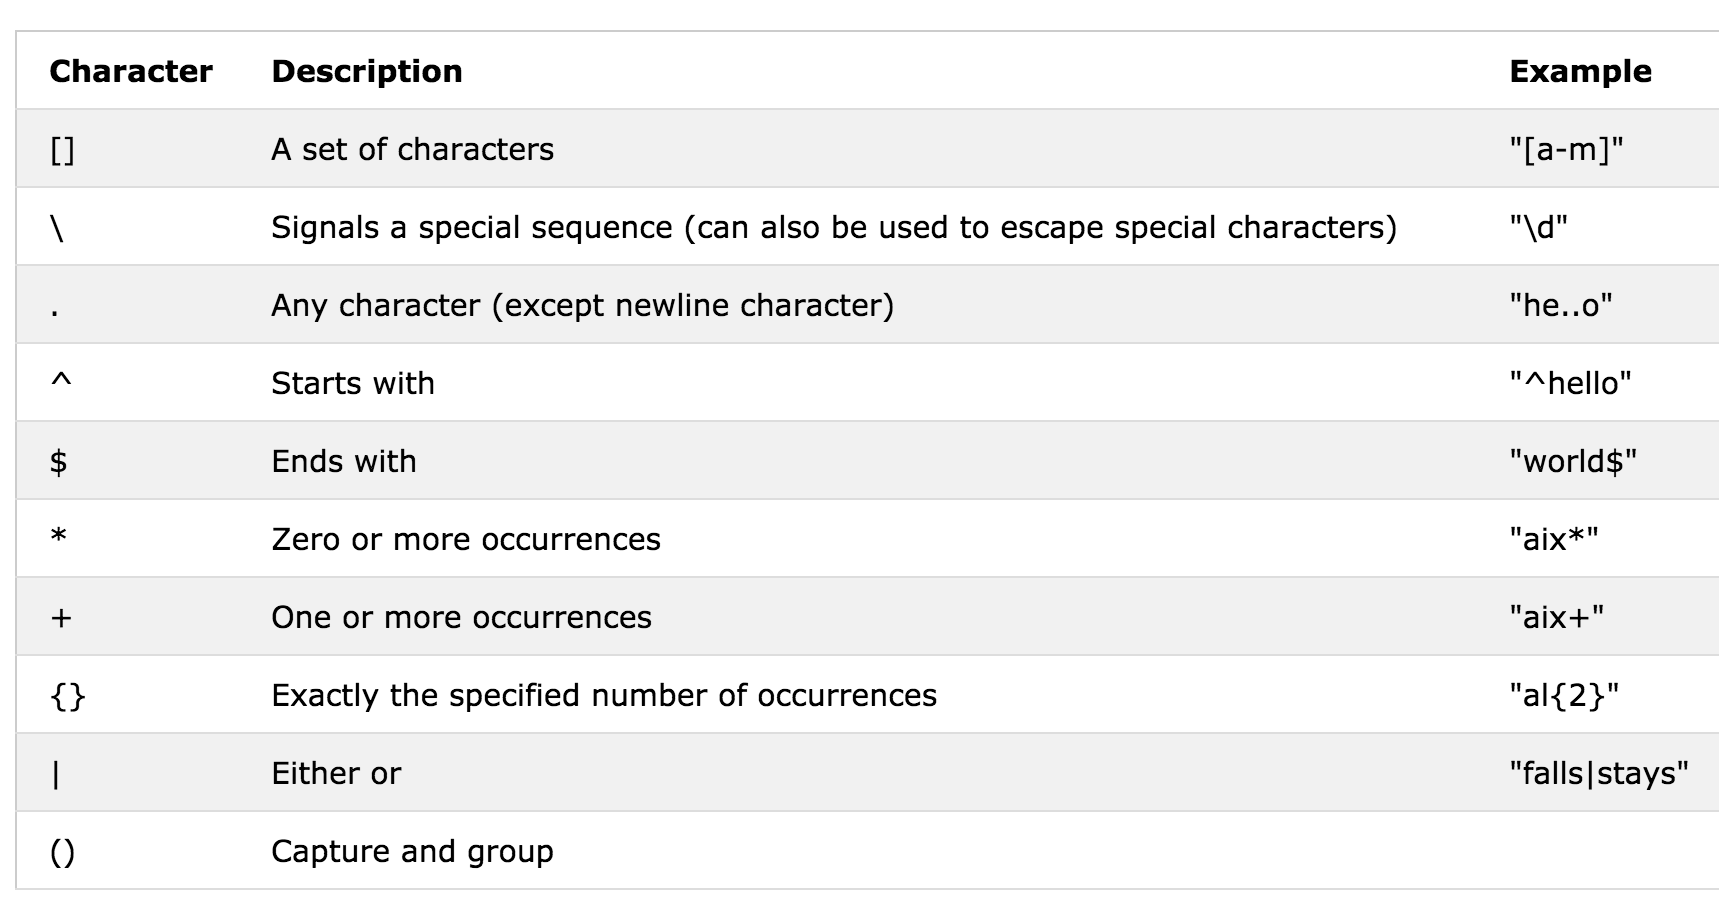

You can build your own custom sentence and word tokenizers using regular expressions!

In [ ]:
re.search("^The.*Spain$", "The king of Spain")

<_sre.SRE_Match object; span=(0, 17), match='The king of Spain'>

In [ ]:
re.search("^The.*Spain$", "The king of Turkey")

In [ ]:
re.search("^The.*(Spain)|(Turkey)$", "The king of Turkey")

<_sre.SRE_Match object; span=(12, 18), match='Turkey'>

Regular expressions are **a esencial** tool for programmers!!! 

# Continue Learning

### WordNet

In [ ]:
from nltk.corpus import wordnet as wn
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Synonym sets containing “good”: 

In [ ]:
poses = { 'n':'noun', 'v':'verb', 's':'adj (s)', 'a':'adj', 'r':'adv'}
for synset in wn.synsets("good"):
  print(f"{poses[synset.pos()]}:{', '.join([l.name() for l in synset.lemmas()])}")

noun:good
noun:good, goodness
noun:good, goodness
noun:commodity, trade_good, good
adj:good
adj (s):full, good
adj:good
adj (s):estimable, good, honorable, respectable
adj (s):beneficial, good
adj (s):good
adj (s):good, just, upright
adj (s):adept, expert, good, practiced, proficient, skillful, skilful
adj (s):good
adj (s):dear, good, near
adj (s):dependable, good, safe, secure
adj (s):good, right, ripe
adj (s):good, well
adj (s):effective, good, in_effect, in_force
adj (s):good
adj (s):good, serious
adj (s):good, sound
adj (s):good, salutary
adj (s):good, honest
adj (s):good, undecomposed, unspoiled, unspoilt
adj (s):good
adv:well, good
adv:thoroughly, soundly, good


hypernyms of “panda”

In [ ]:
panda = wn.synset("panda.n.01")
hyper = lambda s: s.hypernyms()
list(panda.closure(hyper))

[Synset('procyonid.n.01'),
 Synset('carnivore.n.01'),
 Synset('placental.n.01'),
 Synset('mammal.n.01'),
 Synset('vertebrate.n.01'),
 Synset('chordate.n.01'),
 Synset('animal.n.01'),
 Synset('organism.n.01'),
 Synset('living_thing.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

Wordnet library from NLTK is **not** straightforward to use, best is to copy-paste from stack overflow ;)

### Word Tokenization with regexp

In [ ]:
import nltk

sentence = "The brown fox wasn't that quick and he couldn't win the race"

PATTERN = r'\w+' 
regex_wt = nltk.RegexpTokenizer(pattern=PATTERN,
                                gaps=False)
words = regex_wt.tokenize(sentence)
print(words)

['The', 'brown', 'fox', 'wasn', 't', 'that', 'quick', 'and', 'he', 'couldn', 't', 'win', 'the', 'race']


In [ ]:
PATTERN = r'\s+'  
# regex for space
regex_wt = nltk.RegexpTokenizer(pattern=PATTERN,
                                gaps=True)
words = regex_wt.tokenize(sentence)
print(words)

['The', 'brown', 'fox', "wasn't", 'that', 'quick', 'and', 'he', "couldn't", 'win', 'the', 'race']


### Expanding Contractions

In [ ]:
corpus = ["The brown fox wasn't that quick and he couldn't win the race",
          "Hey that's a great deal! I just bought a phone for $199",
          "@@You'll (learn) a **lot** in the book. Python is an amazing language!@@"]

In [ ]:
contraction_map = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" }

This following code is more elaborate, try unpacking it line by line...

In [ ]:
def expand_contractions(sentence, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction
        
    expanded_sentence = contractions_pattern.sub(expand_match, sentence)
    return expanded_sentence
    
expanded_corpus = [expand_contractions(sentence, contraction_map) for sentence in corpus]    
print(expanded_corpus)

['The brown fox was not that quick and he could not win the race', 'Hey that is a great deal! I just bought a phone for $199', '@@You will (learn) a **lot** in the book. Python is an amazing language!@@']


### Remove special characters

In [ ]:
def remove_characters_before_tokenization(sentence,
                                          keep_apostrophes=False):
    sentence = sentence.strip()
    if keep_apostrophes:
        filtered_sentence = re.sub(r'[?|$|&|*|%|@|(|)|~]', '', sentence)
    else:
        filtered_sentence = re.sub(r'[^a-zA-Z0-9 ]', '', sentence)
    return filtered_sentence
    
filtered_corpus = [remove_characters_before_tokenization(sentence) for sentence in expanded_corpus]    
print(filtered_corpus)

['The brown fox was not that quick and he could not win the race', 'Hey that is a great deal I just bought a phone for 199', 'You will learn a lot in the book Python is an amazing language']


### **Token Matcher**

Code from https://spacy.io/usage/rule-based-matching Visit the page for explanations

In [ ]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

pattern = [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]
matcher.add("HelloWorld", None, pattern)

doc = nlp(u"Hello, world! Hello world!")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

15578876784678163569 HelloWorld 0 3 Hello, world


In [ ]:
pattern = [{"ORTH": "("}, {"SHAPE": "ddd"}, {"ORTH": ")"}, {"SHAPE": "ddd"},
           {"ORTH": "-", "OP": "?"}, {"SHAPE": "ddd"}]
matcher.add("PHONE_NUMBER", None, pattern)

doc = nlp(u"Call me at (123) 456 789 or (123) 456 789!")
print([t.text for t in doc])
matches = matcher(doc)
for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text)

['Call', 'me', 'at', '(', '123', ')', '456', '789', 'or', '(', '123', ')', '456', '789', '!']
(123) 456 789
(123) 456 789


In [ ]:
pos_emoji = [u"😀", u"😃", u"😂", u"🤣", u"😊", u"😍"]  # Positive emoji
neg_emoji = [u"😞", u"😠", u"😩", u"😢", u"😭", u"😒"]  # Negative emoji

# Add patterns to match one or more emoji tokens
pos_patterns = [[{"ORTH": emoji}] for emoji in pos_emoji]
neg_patterns = [[{"ORTH": emoji}] for emoji in neg_emoji]

# Function to label the sentiment
def label_sentiment(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    if doc.vocab.strings[match_id] == "HAPPY":  # Don't forget to get string!
        doc.sentiment += 0.1  # Add 0.1 for positive sentiment
    elif doc.vocab.strings[match_id] == "SAD":
        doc.sentiment -= 0.1  # Subtract 0.1 for negative sentiment

matcher.add("HAPPY", label_sentiment, *pos_patterns)  # Add positive pattern
matcher.add("SAD", label_sentiment, *neg_patterns)  # Add negative pattern

# Add pattern for valid hashtag, i.e. '#' plus any ASCII token
matcher.add("HASHTAG", None, [{"ORTH": "#"}, {"IS_ASCII": True}])

doc = nlp(u"Hello world 😀 #MondayMotivation")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = doc.vocab.strings[match_id]  # Look up string ID
    span = doc[start:end]
    print(string_id, span.text)

HAPPY 😀
HASHTAG #MondayMotivation
